**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [225]:
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import time
from sklearn.externals import joblib
#import Recommenders as Recommenders
#import Evaluation as Evaluation

In [226]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9



### Check no.of records and features given in each dataset

In [227]:

print 'Books data set contans:  %d'  % len(books) 
print 'Users data set contans:  %d'  % len(users) 
print 'Ratings data set contans:  %d'  % len(ratings) 

books.info()
users.info()
ratings.info()

Books data set contans:  271360
Users data set contans:  278858
Ratings data set contans:  1149780
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID   

## Exploring books dataset

In [228]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [229]:
books.drop(['imageUrlS','imageUrlM','imageUrlL'],axis=1,inplace=True)

In [230]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [231]:
books.yearOfPublication.unique()

array([2002L, 2001L, 1991L, 1999L, 2000L, 1993L, 1996L, 1988L, 2004L,
       1998L, 1994L, 2003L, 1997L, 1983L, 1979L, 1995L, 1982L, 1985L,
       1992L, 1986L, 1978L, 1980L, 1952L, 1987L, 1990L, 1981L, 1989L,
       1984L, 0L, 1968L, 1961L, 1958L, 1974L, 1976L, 1971L, 1977L, 1975L,
       1965L, 1941L, 1970L, 1962L, 1973L, 1972L, 1960L, 1966L, 1920L,
       1956L, 1959L, 1953L, 1951L, 1942L, 1963L, 1964L, 1969L, 1954L,
       1950L, 1967L, 2005L, 1957L, 1940L, 1937L, 1955L, 1946L, 1936L,
       1930L, 2011L, 1925L, 1948L, 1943L, 1947L, 1945L, 1923L, 2020L,
       1939L, 1926L, 1938L, 2030L, 1911L, 1904L, 1949L, 1932L, 1928L,
       1929L, 1927L, 1931L, 1914L, 2050L, 1934L, 1910L, 1933L, 1902L,
       1924L, 1921L, 1900L, 2038L, 2026L, 1944L, 1917L, 1901L, 2010L,
       1908L, 1906L, 1935L, 1806L, 2021L, u'2000', u'1995', u'1999',
       u'2004', u'2003', u'1990', u'1994', u'1986', u'1989', u'2002',
       u'1981', u'1993', u'1983', u'1982', u'1976', u'1991', u'1977',
       u'1998', u

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [232]:
books[books.yearOfPublication=='DK Publishing Inc']
books[books.yearOfPublication=='Gallimard']



,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [233]:
books=books[books.yearOfPublication!='DK Publishing Inc']
books=books[books.yearOfPublication!='Gallimard']

### Change the datatype of yearOfPublication to 'int'

In [234]:
books['yearOfPublication']=books['yearOfPublication'].astype(int)

In [235]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [236]:
books['publisher'].dropna(inplace=True)

## Exploring Users dataset

In [237]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [238]:
sorted(users.Age.unique())


[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [239]:
 
users['Age'].replace(users[(users['Age'] < 5 ) |  (users['Age'] > 90 ) ].Age,np.NaN,inplace=True)



sorted(users.Age.unique())


[nan,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0]

### Replace null values in column `Age` with mean

In [240]:



age_array = users[users["Age"]!=np.NaN]["Age"]

users["Age"].replace(np.NaN,age_array.mean(),inplace=True)


### Change the datatype of `Age` to `int`

In [241]:
sorted(users.Age.unique())

users['Age'] = users['Age'].apply(np.int64)




In [242]:
print(sorted(users.Age.unique()))
users.info()

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         278858 non-null int64
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


## Exploring the Ratings Dataset

### check the shape

In [243]:
ratings.shape

(1149780, 3)

In [244]:
n_users = users.shape[0]
n_books = books.shape[0]

In [245]:
ratings.head(5)


,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [246]:
#ratings = pd.merge(books, ratings, on=['ISBN'], how='outer')
#ratings=ratings[['userID','ISBN','bookRating']]
#ratings.shape

ratings=ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape

(1031132, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [247]:
#ratings = pd.merge(users, ratings, on=['userID'], how='outer')
#ratings=ratings[['userID','ISBN','bookRating']]
#ratings.shape
ratings=ratings[ratings.userID.isin(users.userID)]
ratings.shape

(1031132, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [248]:

ratings=ratings[ratings.bookRating !=0 ]

### Find out which rating has been given highest number of times

91804


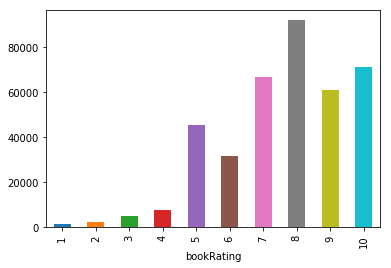

In [249]:
import matplotlib.pyplot as plt
print str(max(ratings.groupby('bookRating').size()))
ratings.groupby('bookRating').size()

#the max rating occuring for rating ='8' is given 91804 times

ratings.groupby('bookRating').size().plot(kind='bar')

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [250]:
#ratings_by_title = ratings.groupby('userID').size()
#print ratings_by_title
#Morepopular=pd.DataFrame(ratings_by_title.index[ratings_by_title >= 100])
#print ratings.shape
#xratings=ratings[ratings.userID.isin(Morepopular.userID)]
#xratings.shape

#print ratings.shape

counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 100].index)]




### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [251]:
ratings['bookRating'].fillna(0, inplace=True)

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [252]:

ratings_pivot= ratings.pivot(index = 'userID', columns = 'ISBN', values = 'bookRating').fillna(0)
X=ratings_pivot.values

from scipy.sparse.linalg import svds
U, sigma, Vt = svds(X, k = 50)
sigma = np.diag(sigma)
all_ratings = np.dot(np.dot(U, sigma), Vt)  

#all_ratings
#ratings.columns
preds_df = pd.DataFrame(all_ratings, columns = ratings_pivot.columns)





### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [253]:
userID = 2110

In [254]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [255]:
sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False)

user_data = ratings[ratings.userID == (userID)]

user_full = (user_data.merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                     sort_values(['bookRating'], ascending=False)
                 )
print 'User {0} has already rated {1} movies.'.format(userID, user_full.shape[0])
print 'Recommending the highest {0} predicted ratings movies not already rated.'.format(10)

recommendations = (ratings[~ratings['ISBN'].isin(user_full['ISBN'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'ISBN',
               right_on = 'ISBN').
         rename(columns = {2110: 'Predict'}).
        # sort_values('Predict', ascending = False).
                       iloc[:10, :-1]
                      )

print recommendations





User 2110 has already rated 103 movies.
Recommending the highest 10 predicted ratings movies not already rated.
   userID        ISBN  bookRating
0  277427  002542730X          10
1  277427  003008685X           8
2  277427  0060006641          10
3  277427  0060542128           7
4  277427  0061009059           9
5  277427  0062507109           8
6  277427  0132220598           8
7  277427  0140283374           6
8  277427  014039026X           8
9  277427  0140390715           7


### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [256]:
user_data=ratings[ratings.userID == 2110]



In [257]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [258]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [259]:
#user_full_info=user_data[user_data.ISBN.isin(books.ISBN)]
#ratings=ratings[ratings.ISBN.isin(books.ISBN)]

user_full_info = pd.merge(user_data, ratings, on=['userID'], how='outer')

In [260]:
user_full_info.shape

(113777, 5)

In [261]:
user_full_info.head()

,userID,ISBN_x,bookRating_x,ISBN_y,bookRating_y
0,2110,0060987529,7.0,0060987529,7
1,2110,0060987529,7.0,0064472779,8
2,2110,0060987529,7.0,0140022651,10
3,2110,0060987529,7.0,0142302163,8
4,2110,0060987529,7.0,0151008116,5


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [262]:
#this is already done, please check above ln255